In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lr=LabelEncoder()

In [6]:
df['Species']=lr.fit_transform(df['Species'])

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [8]:
new_df=df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [9]:
new_df

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

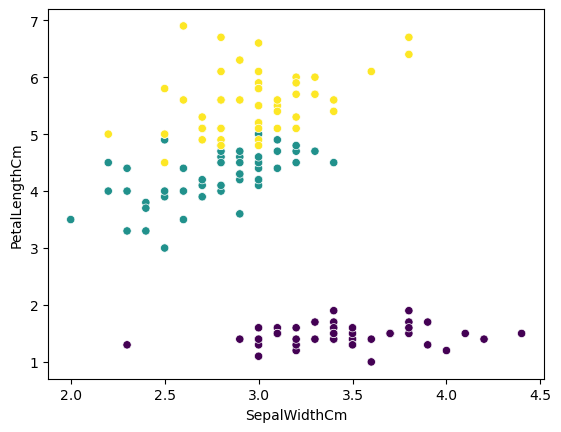

In [10]:
sns.scatterplot(x=df['SepalWidthCm'],y=df['PetalLengthCm'],c=df['Species'])

In [11]:
new_df=new_df.sample(100)

In [12]:
#Train hua model
new_df_train=new_df.iloc[:60,:].sample(10)
#Accuracy Calculated
new_df_val=new_df.iloc[60:80,:].sample(5)
#Test_model
new_df_test=new_df.iloc[80:100,:].sample(5)

In [13]:
new_df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
60,2.0,3.5,1
126,2.8,4.8,2
137,3.1,5.5,2
113,2.5,5.0,2
128,2.8,5.6,2
135,3.0,6.1,2
61,3.0,4.2,1
98,2.5,3.0,1
123,2.7,4.9,2


In [14]:
new_df_val

,SepalWidthCm,PetalLengthCm,Species
104,3.0,5.8,2
134,2.6,5.6,2
143,3.2,5.9,2
146,2.5,5.0,2
130,2.8,6.1,2


In [15]:
new_df_test

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
139,3.1,5.4,2
129,3.0,5.8,2
131,3.8,6.4,2
62,2.2,4.0,1


In [16]:
X_test=new_df_val.iloc[:,0:2].values
y_test=new_df_val.iloc[:,-1].values

In [17]:
X_test

array([[3. , 5.8],
       [2.6, 5.6],
       [3.2, 5.9],
       [2.5, 5. ],
       [2.8, 6.1]])

In [18]:
y_test

array([2, 2, 2, 2, 2])

# Case-1 Bagging

In [19]:
df_bag=new_df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
X.shape

(8, 2)

In [20]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
126,2.8,4.8,2
123,2.7,4.9,2
123,2.7,4.9,2
126,2.8,4.8,2
135,3.0,6.1,2
61,3.0,4.2,1
137,3.1,5.5,2


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [23]:
dt_bag1=DecisionTreeClassifier()
dt_bag2=DecisionTreeClassifier()
dt_bag3=DecisionTreeClassifier()

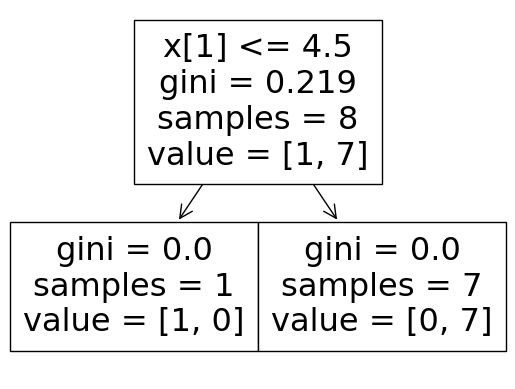

1.0


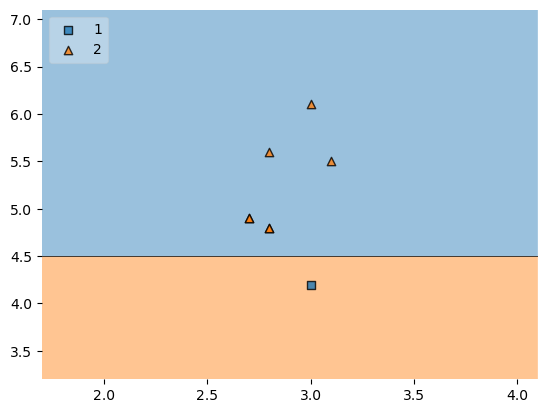

In [24]:
evaluate(dt_bag1,X,y)

In [25]:
df_bag=new_df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
126,2.8,4.8,2
63,2.9,4.7,1
123,2.7,4.9,2
128,2.8,5.6,2
60,2.0,3.5,1
135,3.0,6.1,2
135,3.0,6.1,2


In [26]:
X

,SepalWidthCm,PetalLengthCm
98,2.5,3.0
126,2.8,4.8
63,2.9,4.7
123,2.7,4.9
128,2.8,5.6
60,2.0,3.5
135,3.0,6.1
135,3.0,6.1


In [27]:
y

98     1
126    2
63     1
123    2
128    2
60     1
135    2
135    2
Name: Species, dtype: int64

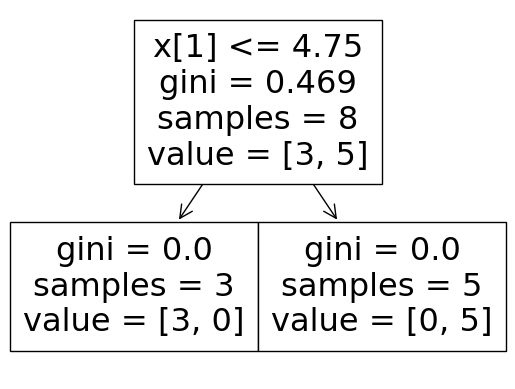

1.0


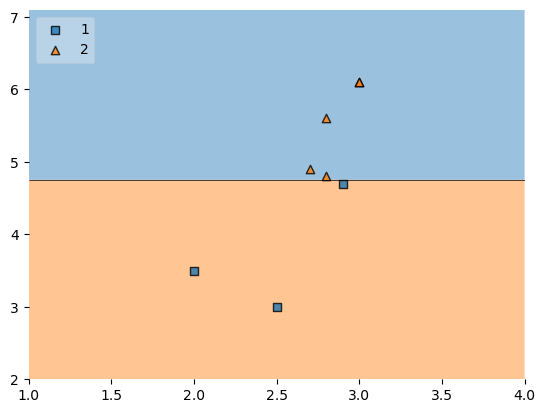

In [28]:
evaluate(dt_bag2,X,y)

In [29]:
df_bag=new_df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

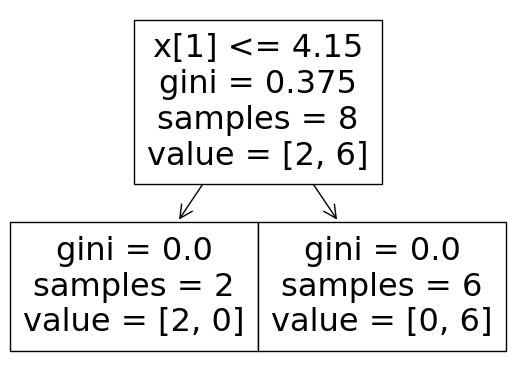

1.0


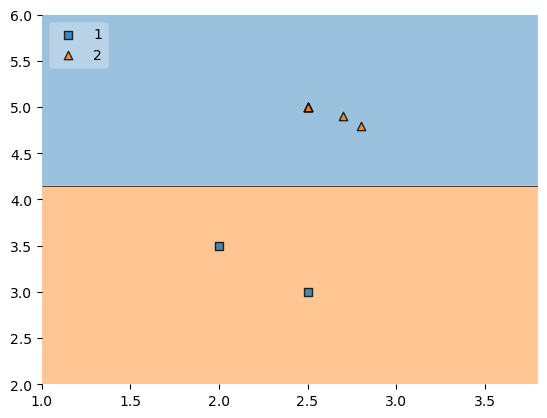

In [30]:
evaluate(dt_bag3,X,y)

# Aggregation

In [31]:
new_df_test

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
139,3.1,5.4,2
129,3.0,5.8,2
131,3.8,6.4,2
62,2.2,4.0,1


In [33]:
print("Predictor 1:",dt_bag1.predict(np.array([3.0,5.8]).reshape(1,2)))
print("Predictor 2:",dt_bag2.predict(np.array([3.0,5.8]).reshape(1,2)))
print("Predictor 3:",dt_bag3.predict(np.array([3.0,5.8]).reshape(1,2)))

Predictor 1: [2]
Predictor 1: [2]
Predictor 1: [2]
